<a href="https://colab.research.google.com/github/Jonathan-Hughes1524/food-sales-prediction/blob/main/Copy_of_Sales_Predictor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing/Loading Data

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries
import pandas as pd

In [3]:
#Load the Dataset
filename = '/content/drive/MyDrive/Coding Dojo/01 Week 1: Python/sales_predictions (1).csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [4]:
# Gathering Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Checking for Duplicates
df.duplicated().sum()

0

In [6]:
# Checking for missing data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For the Item_Weight I chose to take the average weight of the items. I felt with the data that was already known this would give a good data to fill the missing. I did not want to drop this data becasue shipping costs would affect the price of the product. Which in turn could affect the sales of the product.
I also chose do the msot frequent for the store size. The size of the store could impact the amount sold. 

In [7]:
#Fixing missing item weight
item_weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(item_weight_mean, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Fixing missing outlet size
outlet_size_mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(outlet_size_mode, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Fixing inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
#Find min, max and mean by groups
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).min()
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).max()
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


Empty DataFrame
Columns: []
Index: [(4.555, 0.034328578, 110.1544, 1987, High, 1230.3984), (4.555, 0.034350673, 112.7544, 2004, Small, 1789.6704), (4.555, 0.034357169, 112.6544, 1997, Small, 2684.5056), (4.555, 0.034410585, 111.3544, 1999, Medium, 1342.2528), (4.59, 0.070721656, 113.286, 1987, High, 1471.418), (4.59, 0.070767174, 111.986, 2004, Small, 792.302), (4.59, 0.070780558, 114.586, 1997, Small, 1245.046), (4.59, 0.070890602, 111.686, 1999, Medium, 1584.604), (4.61, 0.0, 173.8396, 1997, Small, 1221.0772), (4.61, 0.122629121, 175.4396, 2004, Small, 2616.594), (4.61, 0.122843005, 172.4396, 1999, Medium, 1569.9564), (4.61, 0.123151947, 175.2396, 2009, Medium, 2093.2752), (4.615, 0.101747034, 231.33, 1987, High, 4660.6), (4.615, 0.101812521, 232.23, 2004, Small, 5126.66), (4.635, 0.14086247, 126.4994, 2004, Small, 1670.4922), (4.635, 0.140889111, 127.0994, 1997, Small, 1927.491), (4.635, 0.141108156, 128.2994, 1999, Medium, 2698.4874), (4.785, 0.092516598, 120.1098, 1987, High, 1325.6078), (4.785, 0.092576144, 121.0098, 2004, Small, 2530.7058), (4.785, 0.09297084, 122.0098, 2009, Medium, 2048.6666), (4.805, 0.037668051, 126.7704, 1987, High, 2628.5784), (4.805, 0.037699423, 125.5704, 1997, Small, 3880.2824), (4.805, 0.037852995, 126.2704, 2009, Medium, 3629.9416), (4.88, 0.0, 53.1298, 2004, Small, 808.947), (4.88, 0.133382115, 55.0298, 1987, High, 647.1576), (4.88, 0.133700752, 52.9298, 1999, Medium, 1995.4026), (4.88, 0.134037, 53.3298, 2009, Medium, 539.298), (4.905, 0.117308165, 195.7768, 2004, Small, 2956.152), (4.92, 0.045916788, 198.8084, 1987, High, 2976.126), (4.92, 0.045955031, 199.1084, 1997, Small, 2182.4924), (4.92, 0.046026479, 196.5084, 1999, Medium, 3769.7596), (4.92, 0.046142232, 199.1084, 2009, Medium, 4761.8016), (5.0, 0.044004675, 188.853, 1997, Small, 5502.837), (5.03, 0.008639333, 122.2756, 1987, High, 2059.9852), (5.03, 0.008644894, 122.6756, 2004, Small, 2665.8632), (5.035, 0.0, 228.2036, 1997, Small, 4781.7756), (5.035, 0.079844043, 226.3036, 1987, High, 4098.6648), (5.095, 0.129395895, 140.3838, 1987, High, 1826.2894), (5.095, 0.129479176, 139.7838, 2004, Small, 1264.3542), (5.095, 0.129705008, 141.8838, 1999, Medium, 1966.7732), (5.095, 0.130031207, 142.4838, 2009, Medium, 561.9352), (5.11, 0.0, 164.721, 2009, Medium, 3588.662), (5.11, 0.034868095, 163.821, 2004, Small, 2120.573), (5.11, 0.034874689, 161.721, 1997, Small, 2446.815), (5.15, 0.06112617, 122.5388, 1987, High, 371.5164), (5.15, 0.061165512, 125.6388, 2004, Small, 2848.2924), (5.15, 0.06117708, 121.8388, 1997, Small, 3219.8088), (5.15, 0.061272194, 125.6388, 1999, Medium, 1733.7432), (5.155, 0.083198341, 246.0776, 1997, Small, 990.7104), (5.155, 0.083327693, 247.2776, 1999, Medium, 5944.2624), (5.175, 0.029471408, 105.4622, 1987, High, 3281.7282), (5.175, 0.029490377, 107.6622, 2004, Small, 2858.2794), (5.175, 0.029616108, 107.7622, 2009, Medium, 2011.3818), (5.175, 0.030330202, 35.4874, 1987, High, 388.1614), (5.175, 0.030349723, 37.0874, 2004, Small, 423.4488), (5.175, 0.030479118, 33.2874, 2009, Medium, 635.1732), (5.175, 0.03736783, 86.9224, 1987, High, 255.6672), (5.175, 0.037391881, 83.2224, 2004, Small, 1789.6704), (5.175, 0.037398953, 84.2224, 1997, Small, 852.224), (5.175, 0.037457098, 83.4224, 1999, Medium, 1448.7808), (5.19, 0.042687151, 195.911, 1999, Medium, 2946.165), (5.19, 0.044252621, 102.599, 1997, Small, 1651.184), (5.19, 0.044321422, 103.899, 1999, Medium, 2889.572), (5.19, 0.044432887, 102.899, 2009, Medium, 1651.184), (5.21, 0.011007815, 259.5962, 2004, Small, 2848.9582), (5.26, 0.02454694, 95.7068, 1999, Medium, 1166.4816), (5.26, 0.041764487, 161.8868, 2004, Small, 3275.736), (5.26, 0.041837331, 161.8868, 1999, Medium, 5077.3908), (5.26, 0.041942549, 165.4868, 2009, Medium, 2293.0152), (5.305, 0.04710181, 181.8608, 1999, Medium, 4594.02), (5.305, 0.047220268, 181.9608, 2009, Medium, 2388.8904), (5.32, 0.0, 101.7674, 1987, High, 1120.5414), (5.32, 0.092865746, 100.6674, 2004, Small, 2648.5524), (5.32, 0.093027718,

#Visualization of Data

In [11]:
#Importing visualization libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
#Gathering Item weight info
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Text(0.5, 1.0, 'Item Weight')

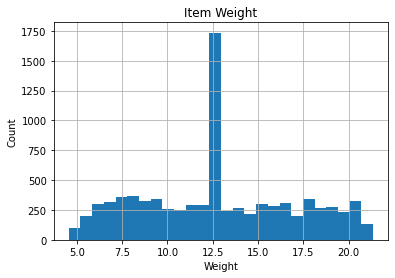

In [13]:
# Setting up a histogram for item weight
df['Item_Weight'].hist(bins='auto')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Item Weight')

The histogram above shows the item weights in the bins on the x axis. The y axis shows the count of items that have that weight. This allows us to see that a majority of the items have a wight around 12.5.

Text(0.5, 1.0, 'Outlet Sales')

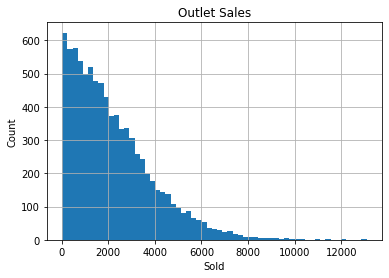

In [14]:
# Histogram of item outlet sales
df['Item_Outlet_Sales'].hist(bins='auto')
plt.xlabel('Sold')
plt.ylabel('Count')
plt.title('Outlet Sales')

Data above shows the number of sales each outlet has made. The x axis is the number of items sold and the y axis is the count of store that sold that much. 

Text(0.5, 1.0, 'Item MRP')

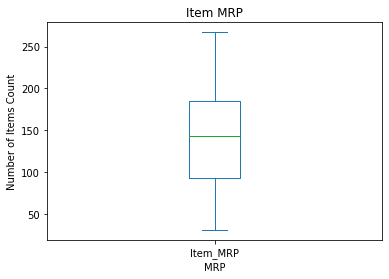

In [15]:
# Boxplot of item mrp
df['Item_MRP'].plot(kind='box')
plt.xlabel('MRP')
plt.ylabel('Number of Items Count')
plt.title('Item MRP')

The box plot above shows the item mrp. Can see the upper extrem of 280 and lower extreme of 20. The median is 140 and the upper quartile is 180 and lower quartile is 90. We can also see that 75% of the Items MRP is greater or equal to 90.

In [16]:
# Item MRP Heatmap
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

In [17]:
# Setting up correlation
corr = df.corr()

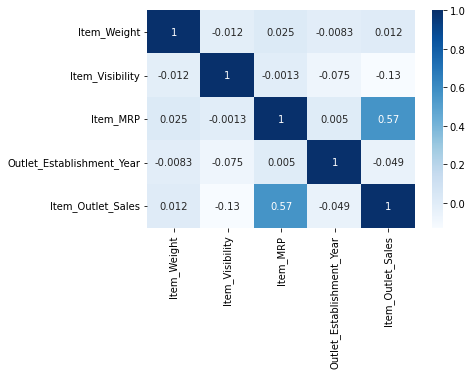

In [18]:
# Graphing heatmap
sns.heatmap(corr, cmap = 'Blues', annot= True)

The heat map above shows the correlation between all the columns. Where each 1 we see a strong correlation between the data sets. We also can see there are a few negative correlations that are week and a few moderate postive correlations in the visualization. 

# Data Trend Visualization

In [19]:
# Get outlet sale grouped by outlet establishment year
numberUniqueOutlet = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()

In [20]:
# This is a panda series
numberUniqueOutlet

Outlet_Establishment_Year
1985    1183
1987     788
1997     778
1998     391
1999     785
2002     776
2004     806
2007     777
2009     779
Name: Item_Outlet_Sales, dtype: int64

In [21]:
# Getting list of years
uniqueYear = list(numberUniqueOutlet.index)
uniqueYear

[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

In [22]:
# Geting list of outlet sales
numOutletSales = list(numberUniqueOutlet.values)
numOutletSales

[1183, 788, 778, 391, 785, 776, 806, 777, 779]

No handles with labels found to put in legend.


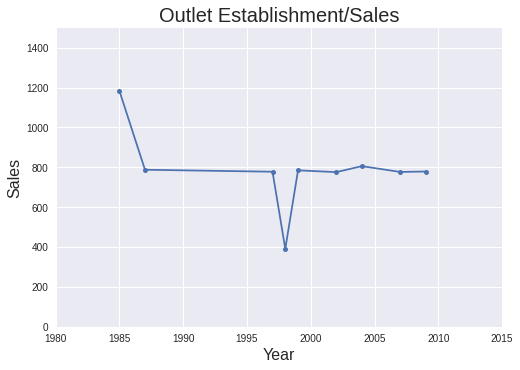

In [24]:
plt.style.use('seaborn')
plt.plot(uniqueYear,numOutletSales, marker = '.', markersize = 10)
plt.xlim(left=1980, right=2015)
plt.ylim( bottom=0, top=1500)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.title('Outlet Establishment/Sales', fontsize = 20)
plt.legend()



This graph above shows the year the outlet was established on the x axis and number of sales on they y axis. We can see the more outlet established the sales dropped from 1985 to 1987. They leveled off some from 1987 to 1997 then dropped agaain. After that we see an increase in sales with a fairly consistent growth or equal sales following. 

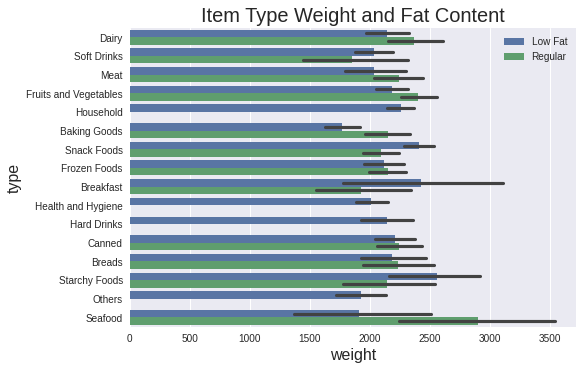

In [37]:
# Three variable bar plot
sns.barplot(data= df, x='Item_Outlet_Sales', y='Item_Type', hue='Item_Fat_Content')
plt.xlabel('weight',fontsize=16)
plt.ylabel('type', fontsize=16)
plt.title('Item Type Weight and Fat Content', fontsize= 20)
plt.legend(bbox_to_anchor=(1,1))

The bar graph above shows item outlet sales on the x axis and the item type on the y axis. The Blue is low fat and the green is regular fat. It allows us to see the sales of items based on the type of fat content. This graph will let us know which items sell better by fat type and how many of each item is sold. for example for seafood we can see that the regular sells better than the low fat by a large amount. 